In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\himan\Desktop\Data Analytics\supermarket_sales.csv"  # Adjust the path if necessary
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


1. Descriptive Analytics (What happened?)

Objective: Summarize historical data to understand trends and patterns.

Step 1: Overview of dataset structure and any missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-n

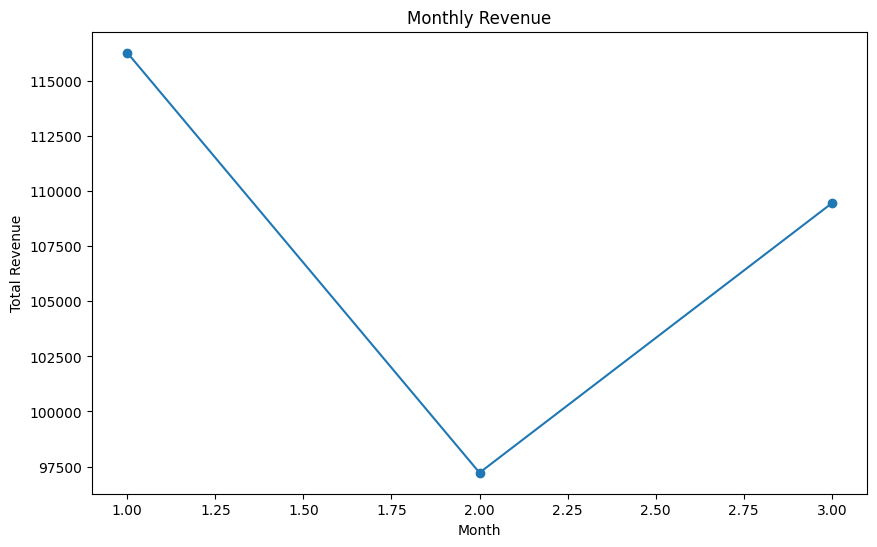


Step 3: Analyzing top products by revenue


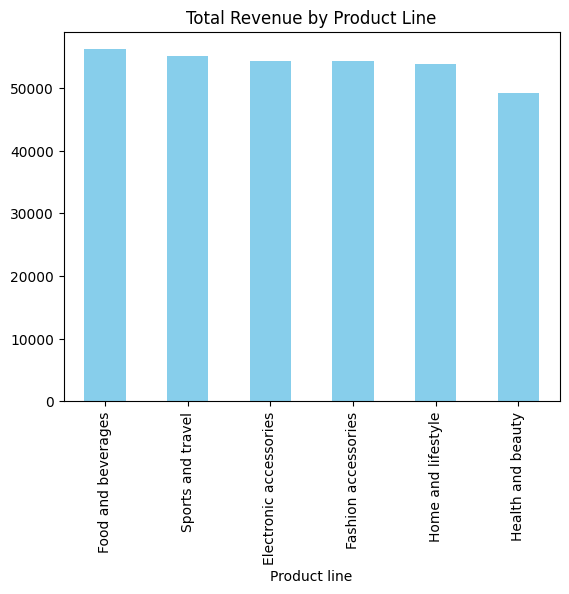


Step 4: Analyzing distribution of customer ratings


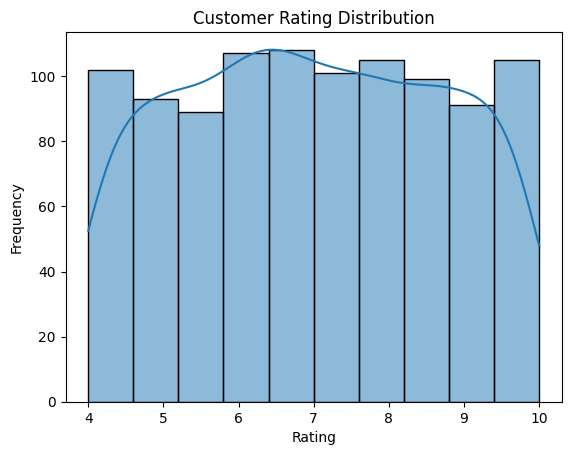

In [44]:
# Step 1: Overview of dataset structure and any missing values
print("Step 1: Overview of dataset structure and any missing values")
data.info()

# Step 2: Monthly revenue trends
print("\nStep 2: Analyzing monthly revenue trends")
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
monthly_revenue = data.groupby('Month')['Total'].sum()

# Plotting Monthly Revenue
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

# Step 3: Top products by revenue
print("\nStep 3: Analyzing top products by revenue")
top_products = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)

top_products.plot(kind='bar', color='skyblue', title='Total Revenue by Product Line')
plt.show()

# Step 4: Distribution of ratings
print("\nStep 4: Analyzing distribution of customer ratings")
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


2. Diagnostic Analytics (Why did it happen?)

Objective: Summarize historical data to understand trends and patterns.

Step 1: Correlation analysis to explore relationships between variables


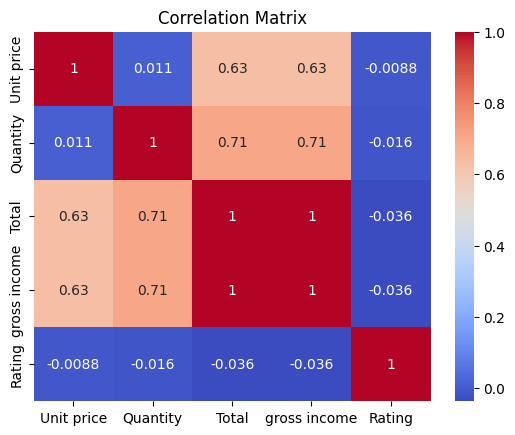


Step 2: Revenue by payment method to explore customer payment preferences


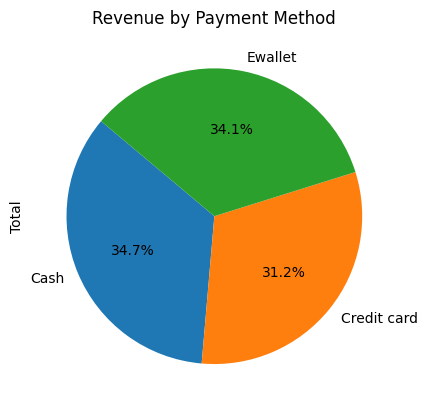


Step 3: Analysis of average spending by customer type


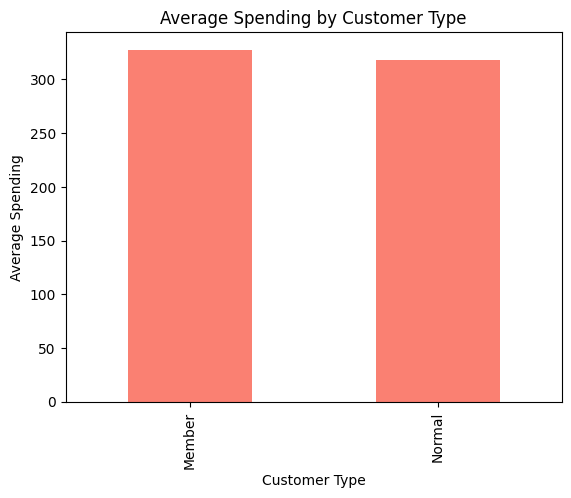


Step 4: Product preference by city


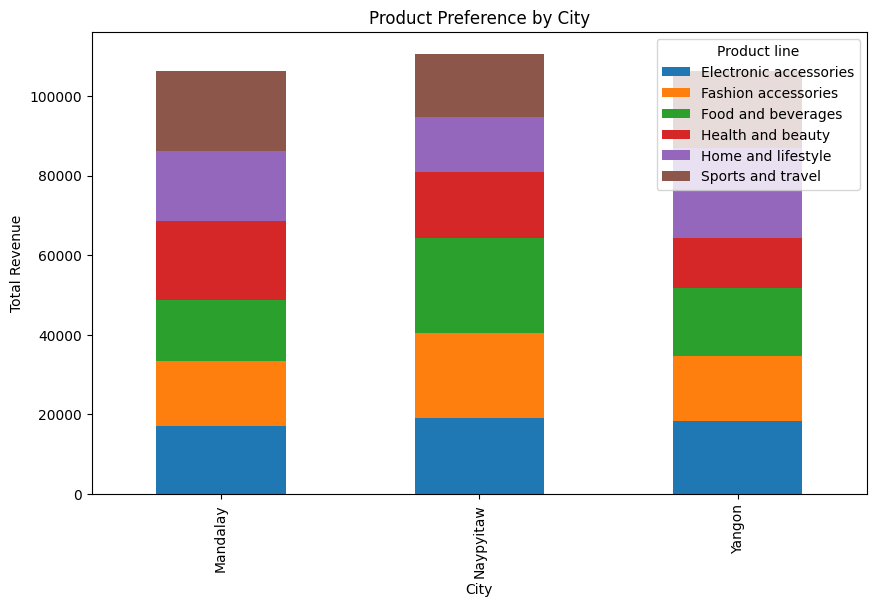


Step 5: Analyzing gender-based spending patterns


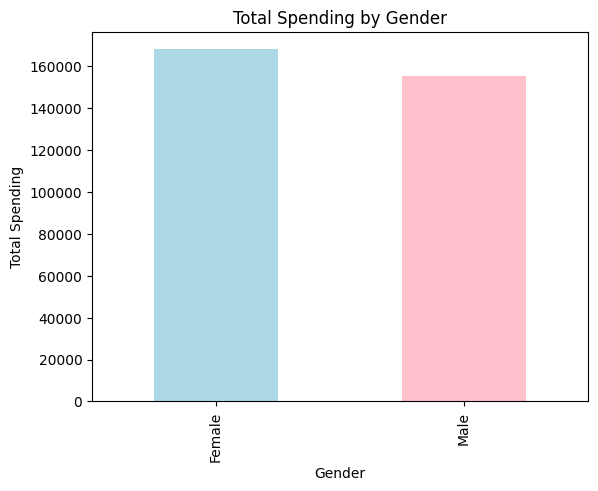

In [48]:
# Step 1: Correlation analysis to explore relationships between variables
print("Step 1: Correlation analysis to explore relationships between variables")
correlation = data[['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 2: Revenue by payment method to explore customer payment preferences
print("\nStep 2: Revenue by payment method to explore customer payment preferences")
payment_revenue = data.groupby('Payment')['Total'].sum()
payment_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Payment Method')
plt.show()

# Step 3: Analysis of average spending by customer type
print("\nStep 3: Analysis of average spending by customer type")
customer_type_avg = data.groupby('Customer type')['Total'].mean()
customer_type_avg.plot(kind='bar', color='salmon')
plt.title("Average Spending by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Spending")
plt.show()

# Step 4: Product preference by city
print("\nStep 4: Product preference by city")
city_product_revenue = data.groupby(['City', 'Product line'])['Total'].sum().unstack()
city_product_revenue.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Product Preference by City")
plt.ylabel("Total Revenue")
plt.show()

# Step 5: Analyzing gender-based spending patterns
print("\nStep 5: Analyzing gender-based spending patterns")
gender_spending = data.groupby('Gender')['Total'].sum()
gender_spending.plot(kind='bar', color=['lightblue', 'pink'])
plt.title("Total Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Spending")
plt.show()


3. Predictive Analytics (What is likely to happen?)

Objective: Use historical data to predict future trends.
Note: This section assumes basic forecasting and regression analysis.

Step 1: Preparing the data for forecasting total sales

Step 2: Splitting the data into training and testing sets

Step 3: Fitting a simple linear regression model

Step 4: Predicting total sales and evaluating the model


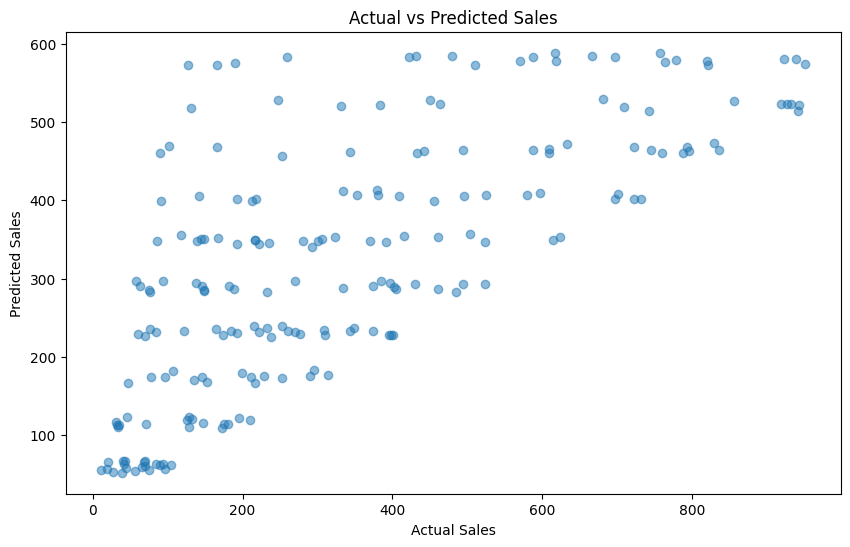


Step 5: Showing feature importance (coefficients)
          Coefficient
Month       -3.561135
Day          0.316918
Quantity    57.902608


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data for forecasting total sales
print("Step 1: Preparing the data for forecasting total sales")
data['Day'] = data['Date'].dt.day
X = data[['Month', 'Day', 'Quantity']]
y = data['Total']

# Step 2: Split the data into training and testing sets
print("\nStep 2: Splitting the data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a simple linear regression model
print("\nStep 3: Fitting a simple linear regression model")
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict total sales and evaluate
print("\nStep 4: Predicting total sales and evaluating the model")
predictions = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Step 5: Feature importance (optional, for linear regression coefficients)
print("\nStep 5: Showing feature importance (coefficients)")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

4. Prescriptive Analytics (What should be done?)

Objective: Provide actionable recommendations to improve business outcomes.

Step 1: Identifying underperforming product lines
Underperforming Product Lines:
 Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Name: gross income, dtype: float64

Step 2: Suggesting discounts for underperforming products
Suggested Discounts for Underperforming Products:
 Product line
Electronic accessories    1.522060
Fashion accessories       1.452806
Food and beverages        1.536531
Name: gross income, dtype: float64

Step 3: Identifying peak sales hours to optimize staffing


C:\Users\himan\AppData\Local\Temp\ipykernel_11004\311468351.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


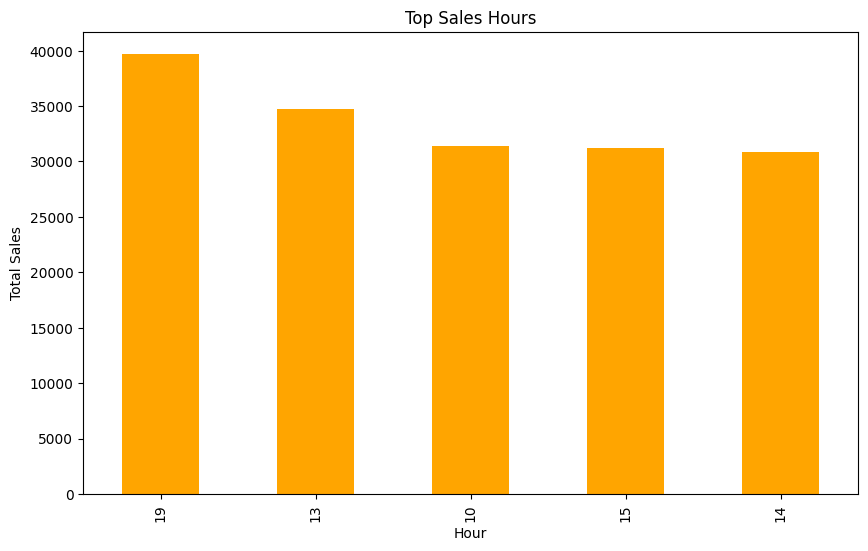


Step 4: Recommending preferred payment method based on customer preference
Recommended focus on payment method: Ewallet

Step 5: Evaluating branch performance for resource allocation


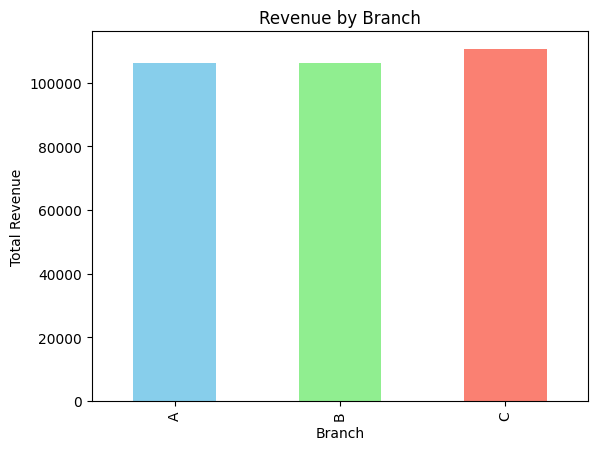

In [53]:
# Step 1: Identify underperforming product lines
print("Step 1: Identifying underperforming product lines")
product_avg_income = data.groupby('Product line')['gross income'].mean()
underperforming_products = product_avg_income[product_avg_income < product_avg_income.mean()]
print("Underperforming Product Lines:\n", underperforming_products)

# Step 2: Suggested discount for underperforming products
print("\nStep 2: Suggesting discounts for underperforming products")
suggested_discounts = underperforming_products * 0.1  # 10% of average gross income
print("Suggested Discounts for Underperforming Products:\n", suggested_discounts)

# Step 3: Identify peak sales hours to optimize staffing
print("\nStep 3: Identifying peak sales hours to optimize staffing")
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
peak_hours = data.groupby('Hour')['Total'].sum().sort_values(ascending=False).head()
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='orange')
plt.title("Top Sales Hours")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()

# Step 4: Recommendation for preferred payment method (customer preference)
print("\nStep 4: Recommending preferred payment method based on customer preference")
preferred_payment = data['Payment'].value_counts().idxmax()
print(f"Recommended focus on payment method: {preferred_payment}")

# Step 5: Branch performance evaluation for resource allocation
print("\nStep 5: Evaluating branch performance for resource allocation")
branch_revenue = data.groupby('Branch')['Total'].sum()
branch_revenue.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Revenue by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Revenue")
plt.show()
